In [18]:
## Importing required packages
import unidecode
import string
import random
import re

In [19]:
all_characters = string.printable
## code to find length of all_characters and storing the value in n_characters
n_characters = len(all_characters)
## code to convert unicode characters into plain ASCII.
file = unidecode.unidecode(open('shakespeare.txt').read())
## code to find length of the file
file_len = len(file)
## printing the length of the file
print('file_len =', file_len)

file_len = 1115393


In [20]:
file[:1000]

"First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you know Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us kill him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be done: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citizens, the patricians good.\nWhat authority surfeits on would relieve us: if they\nwould yield us but the superfluity, while it were\nwholesome, we might guess they relieved us humanely;\nbut they think we are too dear: the leanness that\nafflicts us, the object of our misery, is as an\ninventory to particularise their abundance; our\nsufferance is a gain to them Let us revenge this with\nour pikes, ere we become rakes: for the gods know I\nspeak this in hunger 

In [21]:
## Initializing the length of chunk
chunk_len = 200
## Function to split the string into chunks
def random_chunk():
    ## Initializing the starting index value of the big string 
    start_index = random.randint(0, file_len - chunk_len)
    ## Initializing the ending index of the string 
    end_index = start_index + chunk_len + 1
    ## returning the chunk
    return file[start_index:end_index]

print(random_chunk())

she deny to wed, I'll crave the day
When I shall ask the banns and when be married.
But here she comes; and now, Petruchio, speak.
Good morrow, Kate; for that's your name, I hear.

KATHARINA:
Well have


In [22]:
###importing required packages
import torch
import torch.nn as nn
from torch.autograd import Variable

### Creating recurrent neural network
class RNN(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        self.encoder = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers)
        self.decoder = nn.Linear(hidden_size, output_size)
    
    def forward(self, input, hidden):
        input = self.encoder(input.view(1, -1))
        output, hidden = self.gru(input.view(1, 1, -1), hidden)
        output = self.decoder(output.view(1, -1))
        return output, hidden

    def init_hidden(self):
        return Variable(torch.zeros(self.n_layers, 1, self.hidden_size))

In [23]:
# Turn string into list of longs
def char_tensor(string):
    ## tensor is a array
    tensor = torch.zeros(len(string)).long()
    for c in range(len(string)):
        tensor[c] = all_characters.index(string[c])
    return Variable(tensor)

print(char_tensor('abcDEF'))

tensor([10, 11, 12, 39, 40, 41])


In [24]:
def random_training_set():    
    chunk = random_chunk()
    inp = char_tensor(chunk[:-1])
    target = char_tensor(chunk[1:])
    return inp, target

In [25]:
def evaluate(prime_str='A', predict_len=100, temperature=0.8):
    hidden = decoder.init_hidden()
    prime_input = char_tensor(prime_str)
    predicted = prime_str

    # Use priming string to "build up" hidden state
    for p in range(len(prime_str) - 1):
        _, hidden = decoder(prime_input[p], hidden)
    inp = prime_input[-1]
    
    for p in range(predict_len):
        output, hidden = decoder(inp, hidden)
        
        # Sample from the network as a multinomial distribution
        output_dist = output.data.view(-1).div(temperature).exp()
        top_i = torch.multinomial(output_dist, 1)[0]
        
        # Add predicted character to string and use as next input
        predicted_char = all_characters[top_i]
        predicted += predicted_char
        inp = char_tensor(predicted_char)

    return predicted

In [26]:
## Importing required packages
import time, math
## function to print amount of time passed
def time_since(since):
    s = time.time() - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [29]:
def train(inp, target):
    hidden = decoder.init_hidden()
    decoder.zero_grad()
    loss = 0

    for c in range(chunk_len):
        output, hidden = decoder(inp[c], hidden)
        loss += criterion(output, target[c].unsqueeze(0))

    loss.backward()
    decoder_optimizer.step()

    return loss.data.item() / chunk_len

In [30]:
n_epochs = 2000 #Number of epochs
print_every = 50
plot_every = 20
hidden_size = 100
n_layers = 1
lr = 0.005

decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
## Optimizer
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
## Loss function
criterion = nn.CrossEntropyLoss()

start = time.time()
all_losses = []
loss_avg = 0

#In this for loop for every 100th iteration we are printing the time taken, loss and the chunk.
for epoch in range(1, n_epochs + 1):
    loss = train(*random_training_set())       
    loss_avg += loss

    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 100, loss))
        print(evaluate('Wh', 100), '\n')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0

 12s (50 2%) 2.5361]
Whin find yintals to yoow mest some woplome g hard man tof it! otor toucnresss sound acdin!
Misgly ber 

 28s (100 5%) 2.4215]
WhAnger sae lavurring no ury I ant bere ferait hing fote frour meale dingh seare,
And my Hnathin gre k 

 43s (150 7%) 2.2203]
Whes that el, that to the the home the the shere wer bertall preain ursis the sing hese to brow an the 

 57s (200 10%) 1.9565]
Whe curs to my of the sive dive manes,
And all lor, allis the dfil atim this Thee ars lomple my the er 

 11s (250 12%) 2.1933]
Whatt not whe shall with whash withes
Mise hat be wefarke the have talasies thend but shat santest the 

 28s (300 15%) 2.0031]
Whis a the we he con the the this at the metinot ture a put not crect,
And the his lastire this metie  

 43s (350 17%) 2.0141]
Whith come.

PRATER:
With thas unist fold becop's, not trubple preent nught and by no thene and ay of  

 57s (400 20%) 2.0189]
Whhen the to the and sell jeace the thee for no
And of the for but thee, a hem for sw

Text(0, 0.5, 'loss')

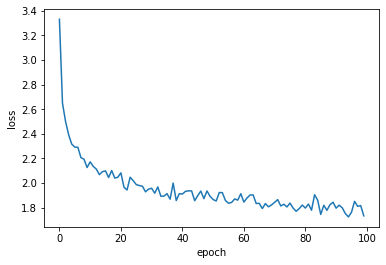

In [32]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(all_losses)
plt.xlabel("epoch")
plt.ylabel("loss")

In [33]:
print(evaluate('u', 200, temperature=0.8))

ut is denones
And cobelain death here the them let twomal.

KING Marged onder was deartlans;
I all fight have onemit supposel our thee band.

DUCESTES:
I hould will brie in the head of Shame
And the be


In [34]:
print(evaluate('how', 200, temperature=1.4))

how tect;
Gow, Ge lesiorent Kbided Coomow gnuittighemew,
Hall have my hast,
Be sumt noblost me bigh is not, foul cofuge.
Pay, yout: me tajeting, with tr, tim
Yeepen'ot brihre soorm of tonlen deeir,-
Qner
